# Task 3

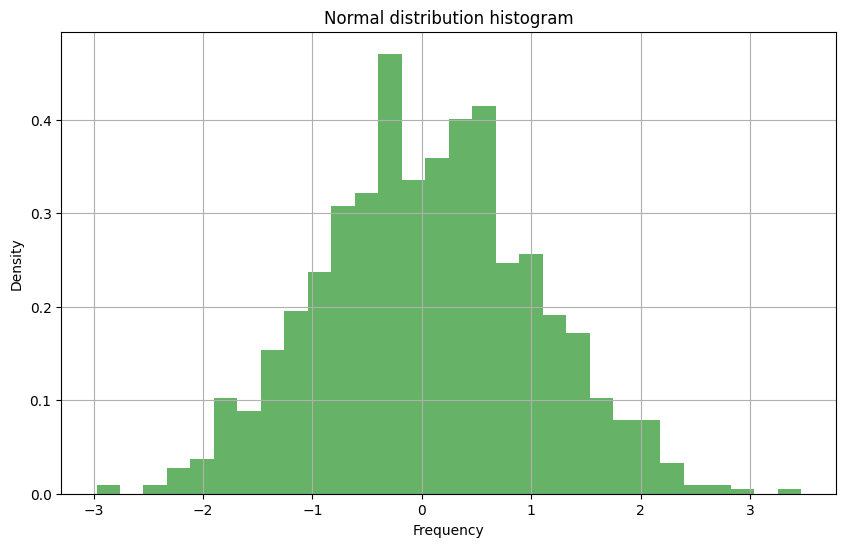

Mean: 0.06, Median: 0.06, Standard Deviation: 0.98, Variance: 0.97, Minimum: -2.97, Maximum: 3.46


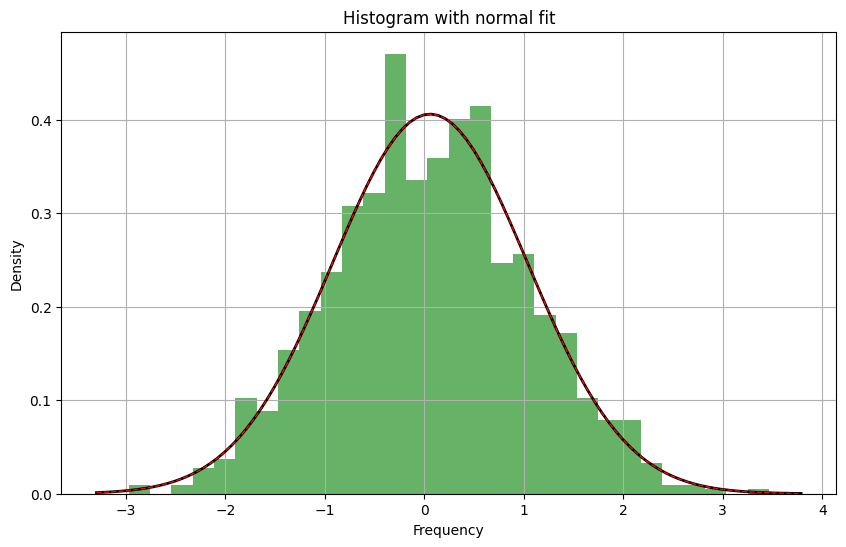

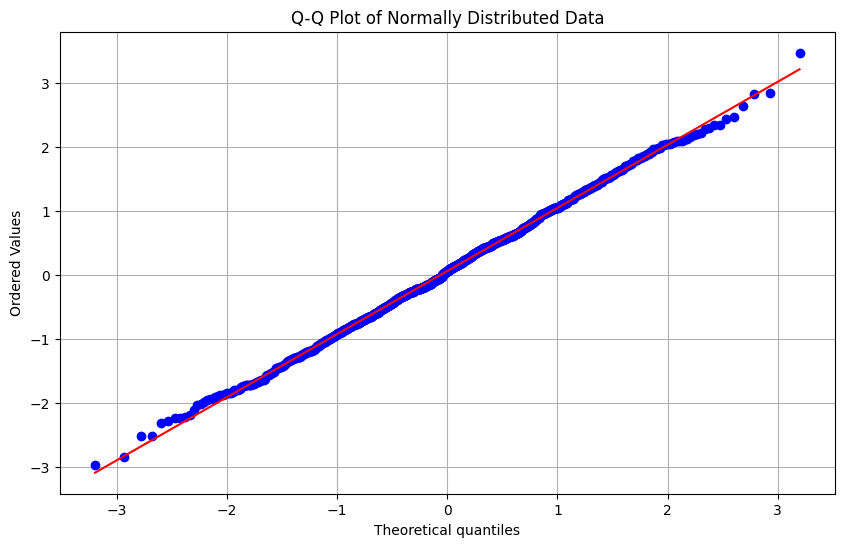

In [10]:
"""
Developer: Corn
Last Modified Date: 02/04/2025
"""
# Exploring Normally Distributed Random Data

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import pandas as pd


## Generating Normally Distributed Random Numbers

# Set parameters for normal distribution
mean = 0      # Center of distribution
std_dev = 1   # Spread of distribution
sample_size = 1000

# Generate normally distributed data
normal_data = np.random.normal(loc=mean, scale=std_dev, size=sample_size)

## Plotting Histogram

plt.figure(figsize=(10, 6))
plt.hist(normal_data, bins=30, density=True, alpha=0.6, color='green')
plt.title('Normal distribution histogram')
plt.xlabel('Frequency')
plt.ylabel('Density')
plt.grid()
plt.show()

## 3. Calculating and displaying statistics

mean = np.mean(normal_data)
median = np.median(normal_data)
std_dev = np.std(normal_data)
variance = np.var(normal_data)
minimum = np.min(normal_data)
maximum = np.max(normal_data)

print(f"Mean: {mean:.2f}, Median: {median:.2f}, Standard Deviation: {std_dev:.2f}, Variance: {variance:.2f}, Minimum: {minimum:.2f}, Maximum: {maximum:.2f}")
## 4. Fit Normal Distribution Curve to Histogram

plt.figure(figsize=(10, 6))

# Plot histogram
plt.hist(normal_data, bins=30, density=True, alpha=0.6, color='green')

# Fit normal distribution and plot curve
mu, std = norm.fit(normal_data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2,)

# Add theoretical normal curve for comparison
theoretical = norm.pdf(x, mean, std_dev)
plt.plot(x, theoretical, 'r--', linewidth=1,)

plt.title('Histogram with normal fit')
plt.xlabel('Frequency')
plt.ylabel('Density')
plt.grid()
plt.show()

## 5. Q-Q Plot for Normality Check

from scipy.stats import probplot

plt.figure(figsize=(10, 6))
probplot(normal_data, plot=plt)
plt.title('Q-Q Plot of Normally Distributed Data')
plt.grid()
plt.show()